Math Methods Lab 1: Numerically Computing Taylor Series

Today we will be taking a closer look at Taylor series.  By the end of this lab you should know how to generate a Taylor series symbolically from a given function and be able to plot it.  Out of necessity, a small bit of the code below is complicated (clearly marked as *more complicated helper code*) and you are not expected to understand exactly how it works.  You will just need to execute this code (shift-enter or shift-return)

Please remember to change the name of this file to include your name.

In [ ]:
#Much like last time, here are the modules (libraries of extra functions) that we need to import.

#To import a module just type import, and the name of the module
import math  #now we can use a cos function by writing math.cos()
#another way you often see modules imported is in the following:
from sympy import *  #This imports everything (using *) from the sympy module (a module for symbolic manipulations)
#The main difference here is that with "from math import *" we can use a cos function by just typing cos(3.1415),
#whereas with "import math" we need to write math.cos()
#Don't use the from ___ import * version often, since more than one module could have functions with the same name.
#If you know the function within a given module that you want to use (say cos), you can write "from math import cos"
#you can also shorten the name of a module as seen here:
import numpy as np  #numpy allows us to work with matrices and arrays (we won't use it today), and we could write
#np.array() instead of numpy.array()   ... so this is useful for modules with long names
get_ipython().magic('matplotlib inline')  #*more complicated helper code* this helps with plotting
import matplotlib.pyplot as plt  #this is the main plotting function that we will use in this lab

For Loops

In [ ]:
#For loops are a useful control structure that allows us to execute a bit of code repeatedly.
#here we will declare a variable and repeatedly add a series of integers to it
a_0 = 0
#this for loop runs through the indented code ten times, with i increased each time (starting at i = 0 and the last iteration with i = 9 ... the last number in this range is not included)
for i in range(0,10):       
    a_0 += i   #  a += c means the same as a = a + c   
    #Also notice that the above line is indented.  Indentation (tab spacing) is how python knows what is part of the loop.
print(a_0)  #the print statement is not indented and therefore not part of the loop


#or we can use it for creating and iterating over a list (last time we did this with list comprehensions)
List_1 = []  #this creates an empty list
for k in range(0,30):
    List_1.append(k)    #remember that append(k) puts k at the end of the list (and the list now has one more element)
print(List_1)


45
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
#Use lists and a for loop to create a list of the first 20 Bernoulli numbers (these are a sequence of 
#numbers such that a given number is equal to the sum of the two previous numbers)
#The first few Bernoulli numbers are: 1,1,2,3,5,8,13,21, ....
Bernoulli = [1,1]  #start with this list and use a for loop to successively add the next 18 Bernoulli numbers
#Hint, it is made much easier if you can reference the last two elements of the list (Bernoulli[-1] and Bernoulli[-2])
first = Bernoulli[-1]
second = Bernoulli[-2]
for i in range(0,18):
  temp = first + second
  first = second # the value 
  second = temp
  Bernoulli.append(temp)
  i+=1 
#print out the list
print(Bernoulli)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


Symbolic Manipulations and Taylor Series

In [ ]:
#Now let's put a few of these ideas together and investigate Taylor series.
#First we will look at symbolic functions and their Taylor series expansion.
#Symbolic functions can not be numerically evaluated, but we can take derivatives of them
x = Symbol('x')      #first we need to declare the independent variable to be symbolic
fn = x**(1/2)*cos(x)  #next we define our funtion of this variable (different from the above function declarations)
#See http://docs.sympy.org/latest/modules/functions/index.html for a list of available symbolic functions
print(fn)

x**0.5*cos(x)


In [ ]:
#create a few symbolic functions in this manner
y = Symbol('z^2')      
ln = y**(2)*sin(y) 
print(ln)


z^2**2*sin(z^2)


In [ ]:
#We can create a Taylor Series:
TaylorFunc  = series(fn,x,1,6)  #pass in the symbolic function, the independent variable, 
#the point to expand about (1 here), and the order of the expansion (number of terms to keep ... here it is 6).

print(TaylorFunc)  #Notice the output has a term that starts O(....) ... this is just to remind us that we are 
#not including higher order terms (look up "big O notation" if you want to know more)

cos(1) + (x - 1)*(-sin(1) + 0.5*cos(1)) + (x - 1)**2*(-0.5*sin(1) - 0.625*cos(1)) + (x - 1)**3*(-0.1875*cos(1) + 0.291666666666667*sin(1)) + (x - 1)**4*(0.0208333333333333*sin(1) + 0.0651041666666667*cos(1)) + (x - 1)**5*(0.00989583333333333*sin(1) + 0.0169270833333333*cos(1)) + O((x - 1)**6, (x, 1))


In [ ]:
#Now try to a Taylor series expansion of the symbolic functions you created.  
#Try different values for the expansion point and the order of the expansion
TaylorFunc1 = series(ln,y,1,6) 
print(TaylorFunc1)



sin(1) + (z^2 - 1)*(cos(1) + 2*sin(1)) + (z^2 - 1)**2*(sin(1)/2 + 2*cos(1)) + (z^2 - 1)**3*(-sin(1) + 5*cos(1)/6) + (z^2 - 1)**4*(-11*sin(1)/24 - cos(1)/3) + (z^2 - 1)**5*(-19*cos(1)/120 + sin(1)/12) + O((z^2 - 1)**6, (z^2, 1))


Numeriucally Evaluating Taylor Series Expansions

In [ ]:
#Now we want to be able to numerically evaluate these Taylor series expansions
#I've written a brief function to do just that (some of this is *more complicated helper code*)
def GetExpansion(func,var,exp_pt, ser_ord):
    Expansion = series(func, var,exp_pt,ser_ord).removeO()  #the remove O removes the big O part of the series
    return lambdify(var,func), lambdify(var,Expansion)  #This returns two items
#Don't worry about understandimng lambdify (*more complicated helper code*)

#Now let's use this function
expansion_point = 1
series_order = 5
#The function GetExpansion returns the original function (changed to allow inputing actual numbers) and the 
#Taylor series expansion
OriginalFunc, TaylorApprox = GetExpansion(fn,x,expansion_point,series_order)

In [ ]:
#Now we can actually evaluate these two functions (the original and Taylor series approximation)
print(OriginalFunc(1),TaylorApprox(1))  #make sure they agree at the expansion point
print(OriginalFunc(1.2),TaylorApprox(1.2))  #but they differ away from the expansion point
print(OriginalFunc(6),TaylorApprox(6))     #and are very different far from the expansion point

0.5403023058681398 0.5403023058681398
0.3969430320275854 0.39693867151261747
2.3519272684752552 29.679997223164968


In [ ]:
#Use this function to create new versions of your functions and their Taylor series that can be numerically evaluated
#Compare them at the expansion point as well as farther away
MyFunc1, TaylorApprox1 = GetExpansion(ln,y,expansion_point,series_order)
print(MyFunc1(1),TaylorApprox1(1)) 
print(MyFunc1(6),TaylorApprox1(6)) 

0.8414709848078965 0.8414709848078965
-10.058957935161331 -353.0205441862804


Plotting Taylor Series

In [ ]:
#We would like to plot our Taylor Series expansions over some domain.
#First we need to create a list with equally spaced x-values over the domain
xstart = 0  #The left side of the domain
xend = 4    #The right side of the domain
Numpoints = 100  #The number of points to include
xval = np.linspace(xstart,xend,Numpoints).tolist()   #(*more complicated helper code*)  This creates our xvalue list

#Now we want to find the values of the original function, it's Taylor series expansion function, and their difference
#at each of the values of xval (the xvalue list)
yval = []         #we create a few empty list to put the data into
originalyval = []
diffyval = []
#we loop over the indices of xval
for i in range(0,len(xval)):
    yval.append(TaylorApprox(xval[i]))  #we evaluate each function at each x-value and add it to the appropriate list
    originalyval.append(OriginalFunc(xval[i]))
    diffyval.append(TaylorApprox(xval[i])-OriginalFunc(xval[i]))

In [ ]:
#Now create the analogous x and y-value lists for your functions.
#You might want to use different values for the domain to get your functions to graph nicely
xstart1 = 0  #The left side of the domain
xend1 = 4    #The right side of the domain
Numpoints = 100  #The number of points to include
Myxval = np.linspace(xstart1,xend1,Numpoints).tolist()

Myyval = []         #we create a few empty list to put the data into
Myoriginalyval = []
Mydiffyval = []
for i in range(0,len(Myxval)):
    Myyval.append(TaylorApprox1(Myxval[i]))  #we evaluate each function at each x-value and add it to the appropriate list
    Myoriginalyval.append(MyFunc1(Myxval[i]))
    Mydiffyval.append(TaylorApprox1(Myxval[i])-MyFunc1(Myxval[i]))


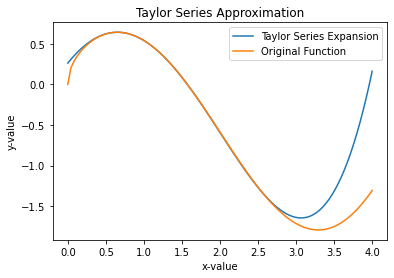

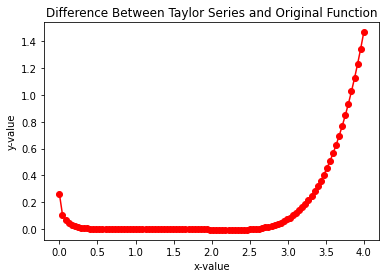

In [ ]:
#Finally we can plot
plt.plot(xval,yval,label='Taylor Series Expansion')  #this plots the points in these two lists, treated as x and y values
plt.plot(xval,originalyval,label='Original Function')  #plotting a second time before the plt.show() command will put the two plots together
plt.ylabel("y-value")    #these add labels to the x and y axis
plt.xlabel("x-value")
plt.title("Taylor Series Approximation")   #this inserts a title for the plot
plt.legend()    #this puts in a box with the labels
plt.show()

#now let's plot the difference between these two (the Taylor Series approx. and the original function)
plt.plot(xval,diffyval,'ro-')  #this plot will be placed below the other plot
#notice the 'ro-' argument.  'r' is for red (we can specify the line color), and 'o' is for showing the data points
#the '-' is to put a line through the data points
plt.ylabel("y-value")    #adding labels to the x and y axis again
plt.xlabel("x-value")
plt.title("Difference Between Taylor Series and Original Function")   #this inserts a title for the plot
plt.show()

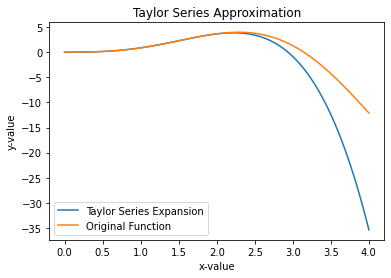

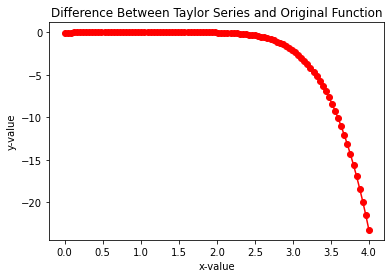

In [ ]:
#Plot your functions in this way.

plt.plot(Myxval,Myyval,label='Taylor Series Expansion')  #this plots the points in these two lists, treated as x and y values
plt.plot(Myxval,Myoriginalyval,label='Original Function')  #plotting a second time before the plt.show() command will put the two plots together
plt.ylabel("y-value")    #these add labels to the x and y axis
plt.xlabel("x-value")
plt.title("Taylor Series Approximation")   #this inserts a title for the plot
plt.legend()    #this puts in a box with the labels
plt.show()

#now let's plot the difference between these two (the Taylor Series approx. and the original function)
plt.plot(Myxval,Mydiffyval,'ro-')  #this plot will be placed below the other plot
#notice the 'ro-' argument.  'r' is for red (we can specify the line color), and 'o' is for showing the data points
#the '-' is to put a line through the data points
plt.ylabel("y-value")    #adding labels to the x and y axis again
plt.xlabel("x-value")
plt.title("Difference Between Taylor Series and Original Function")   #this inserts a title for the plot
plt.show()

In [ ]:
#Comment on what you noticed about how good the Taylor series approimation was for different expansion points
#and different expansion orders

## It looks like it almost got the series entirely at the beginning but then at the end, it curved down more than the actual series 